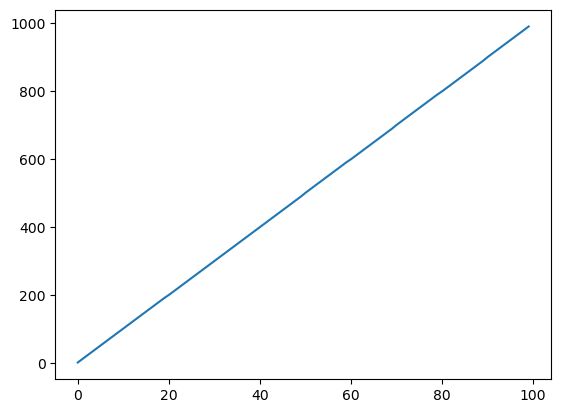

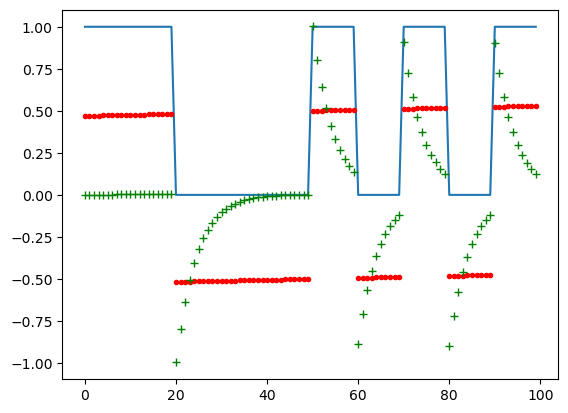

In [29]:
import numpy as np
from matplotlib import pyplot as plt
import scipy

def phase_extractor(fourier, t_max, t):     
   
    phase = np.angle(fourier)
    
    # Unwrap the phase to remove jumps or discontinuities
    phase_spectrum = np.unwrap(phase)
    #proper_phase = torch.from_numpy(phase_realtime)
    return phase_spectrum 


def dc_blocker(in_signal):
    alpha = 0.8
    
    out_signal = np.zeros(len(in_signal))
    
    for t in np.arange(1,len(in_signal)):
        out_signal[t] = alpha*out_signal[t-1] + in_signal[t] - in_signal[t-1]
        
    return out_signal

N = 10

jumps = np.random.choice([0, 1], size=(N,))

longer_jumps = np.kron(jumps, np.ones(10))

unwrapped_jumps = longer_jumps + 10*np.arange(0,len(longer_jumps)) 

detrended_jumps = scipy.signal.detrend(unwrapped_jumps)

dc_blocked_jumps = dc_blocker(detrended_jumps)


plt.figure(1)
plt.plot(unwrapped_jumps)

plt.figure(2)
plt.plot(longer_jumps)
plt.plot(detrended_jumps, 'r.')
plt.plot(dc_blocked_jumps, 'g+')